# Problem Statement
* The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (so this is our variable y).

# Importing important libraries

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

# Read Data

In [41]:
bnk = pd.read_csv('banking.csv')

# EDA

In [42]:
bnk.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [44]:
bnk.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [45]:
bnk.size

864948

In [46]:
bnk.shape

(41188, 21)

# Univariate Analysis

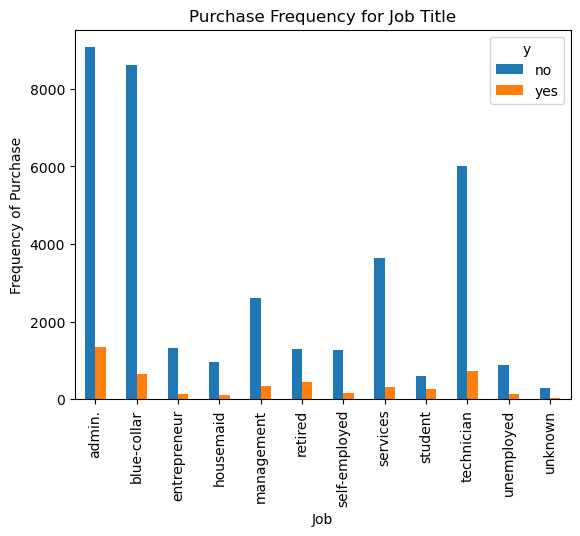

In [47]:
pd.crosstab(bnk.job,bnk.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

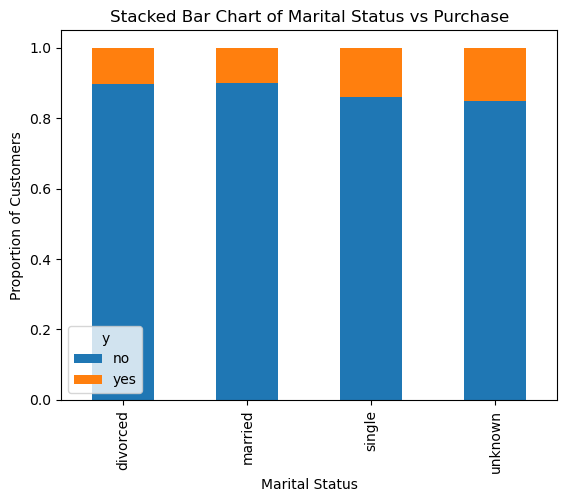

In [48]:
table=pd.crosstab(bnk.marital,bnk.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

* Marital status doesn't seem to be a good predictor

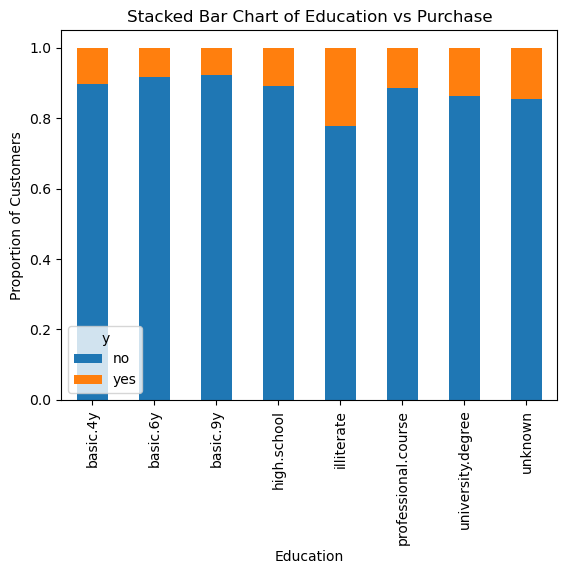

In [49]:
table=pd.crosstab(bnk.education,bnk.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

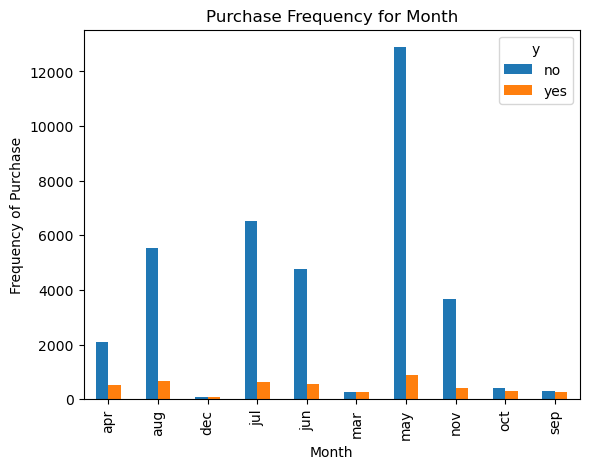

In [50]:
pd.crosstab(bnk.month,bnk.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

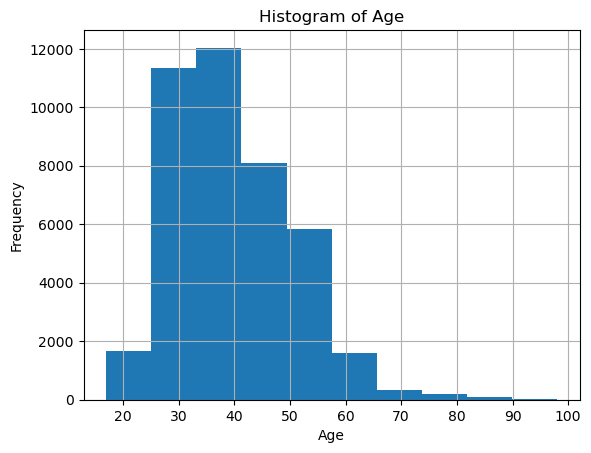

In [51]:
bnk.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

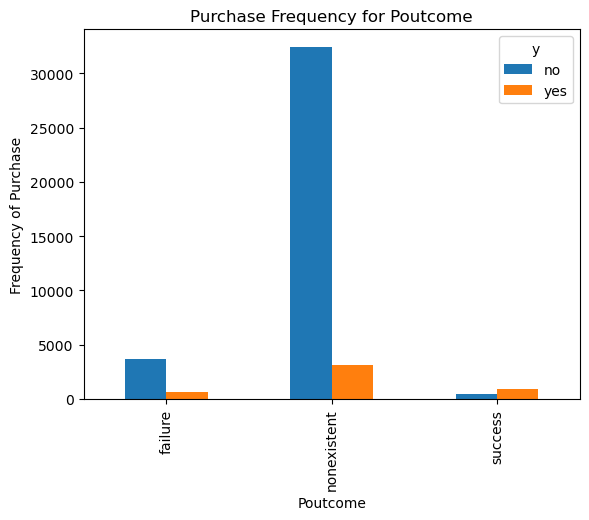

In [52]:
pd.crosstab(bnk.poutcome,bnk.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

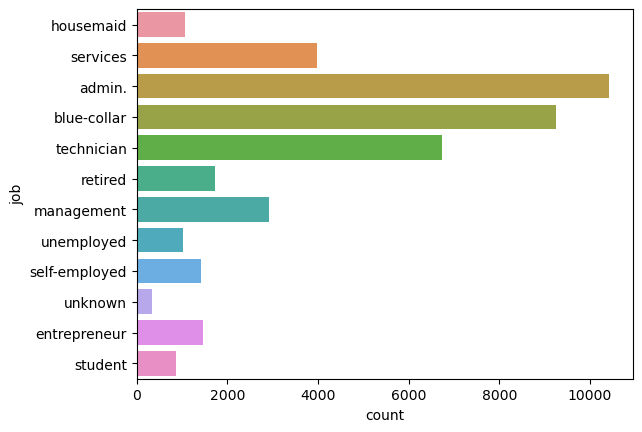

In [53]:
sns.countplot(data = bnk, y = "job")
plt.show()

In [54]:
bnk.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


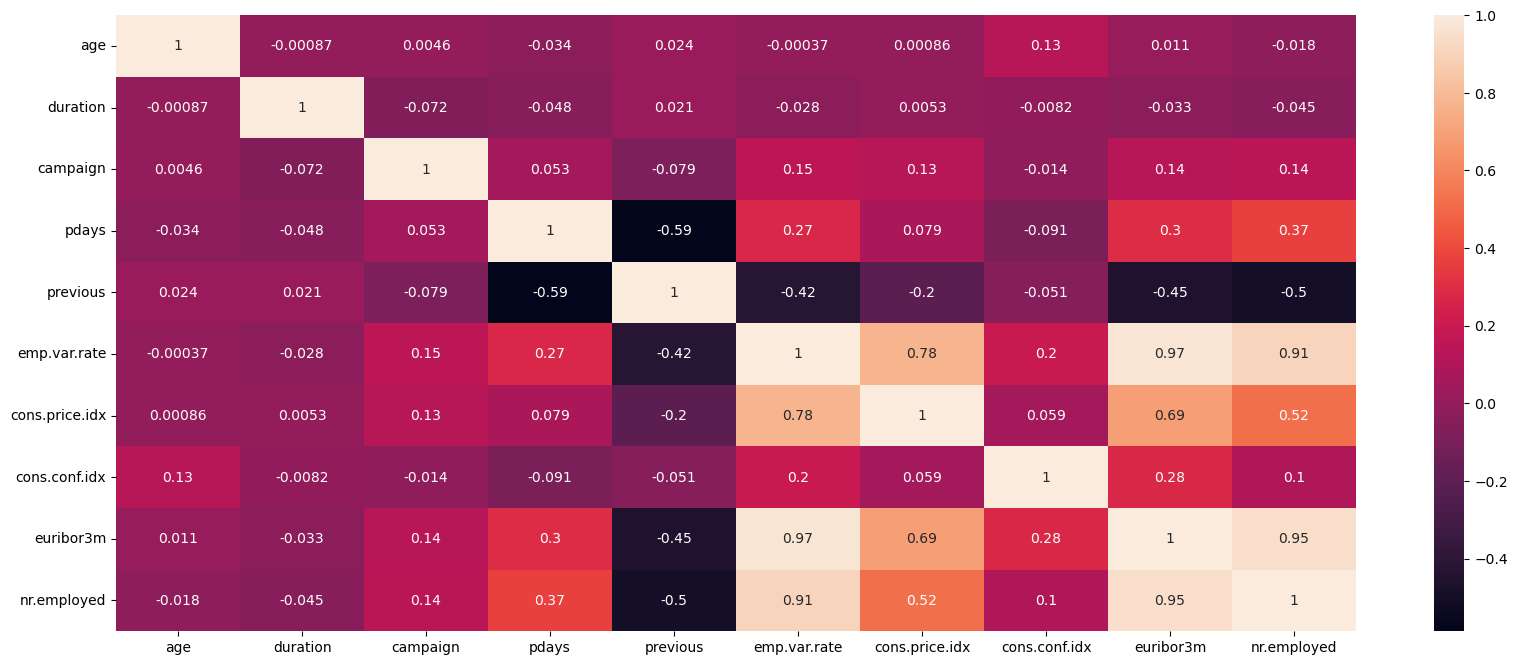

In [55]:
plt.figure(figsize=(20,8))
sns.heatmap(bnk.corr(),annot=True);

# Bivariate Analysis

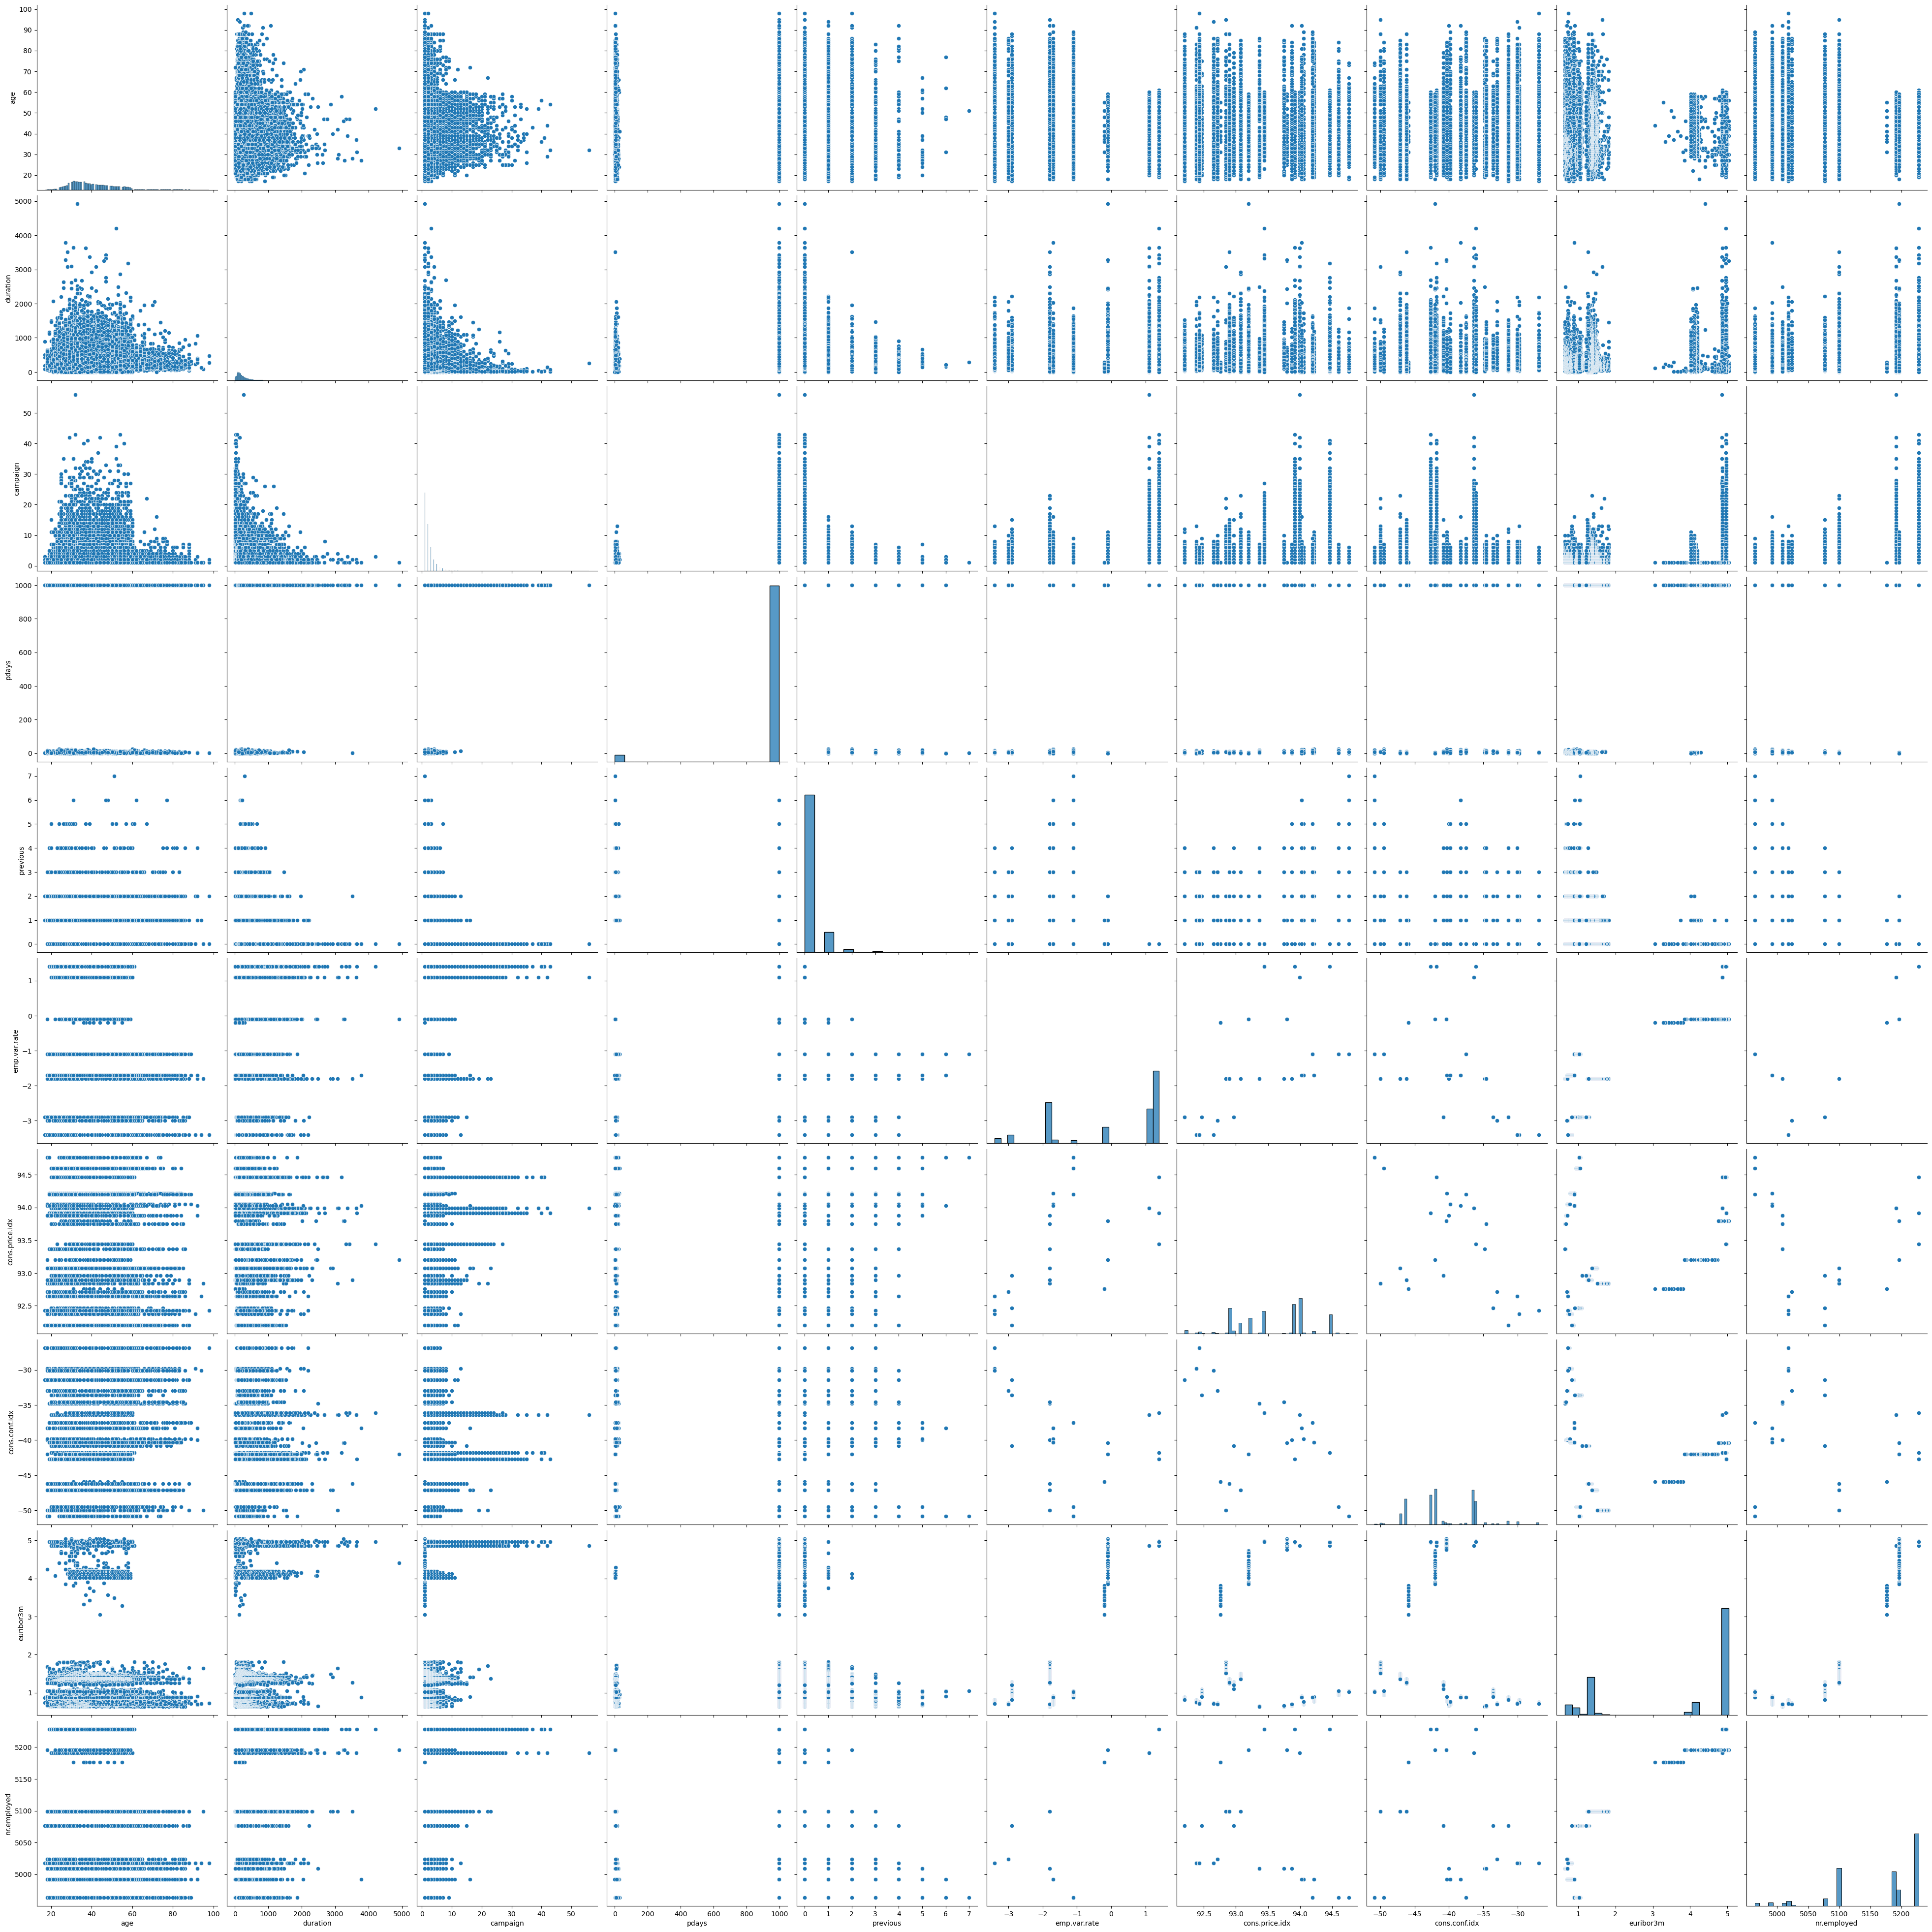

In [56]:
sns.pairplot(bnk,height=4,aspect=1);

# Handle missing values

In [57]:
bnk.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no missing values in this dataset

# Handling outliers

<AxesSubplot:>

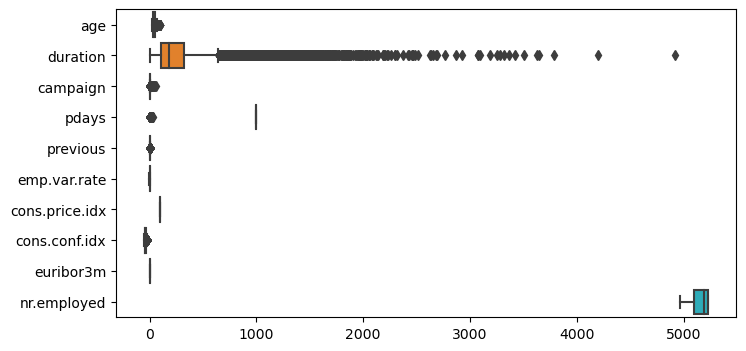

In [58]:
plt.figure(figsize = (8,4))
sns.boxplot(data = bnk,orient = 'h')

In [75]:
for colname,colvals in bnk.iteritems():
    if bnk[colname].dtype!=object:
        Q1=bnk[colname].quantile(q=0.25)
        Q3=bnk[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        bnk.loc[(bnk[colname]<low) | (bnk[colname]>up) ,colname]=bnk[colname].median()
    else:
           continue

<AxesSubplot:>

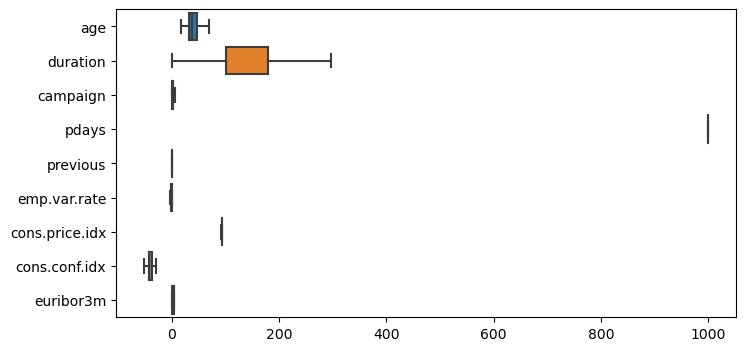

In [76]:
plt.figure(figsize = (8,4))
bnk1 = bnk.drop(['nr.employed'],axis = 1)
sns.boxplot(data = bnk1,orient = 'h')

# Handle categorical data

In [77]:
# categorical data
cat_data=bnk[bnk.select_dtypes(include=[np.object]).columns.to_list()]
cat_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16864\4293433226.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_data=bnk[bnk.select_dtypes(include=[np.object]).columns.to_list()]


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [78]:
# numerical data
num_data=bnk[bnk.select_dtypes(include=[np.number]).columns.to_list()]
num_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,180,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [79]:
# Convert categorical data into numerical

from sklearn.preprocessing import LabelEncoder
cat_data=cat_data.apply(LabelEncoder().fit_transform)
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


In [80]:
# combining numerical and categorical data

bank=pd.concat([num_data,cat_data],axis=1)
bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,180,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0


# Selecting X Independent and y dependent variables

In [81]:
X = bank.drop('y',axis=1)
y = bank['y']

In [82]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [83]:
# split the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled,y, test_size = 0.2, random_state = 42)

In [84]:
#import the model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [85]:
# fit the model with data

logreg.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_train_pred = logreg.predict(X_train)

In [87]:
y_test_pred = logreg.predict(X_test)

In [88]:
from sklearn import metrics
print("Accuracy train:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy test:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy train: 0.9026100151745068
Accuracy test: 0.9014323865015781


In [89]:
# import the metrics class
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[7176,  127],
       [ 685,  250]], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


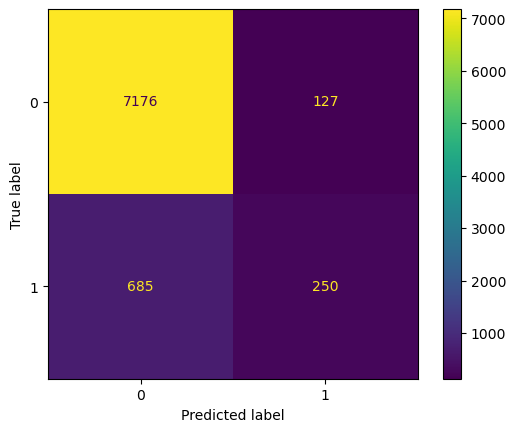

In [93]:
metrics.plot_confusion_matrix(logreg, X_test, y_test)
plt.show();

In [90]:
from sklearn import metrics
# accuracy measures by classification report
result = metrics.classification_report(y_test,y_test_pred)
# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7303
           1       0.66      0.27      0.38       935

    accuracy                           0.90      8238
   macro avg       0.79      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


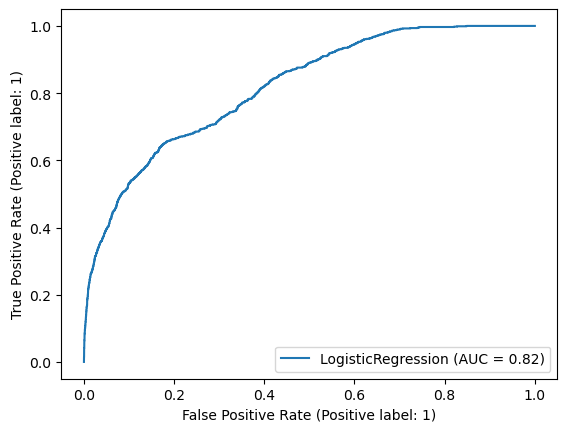

In [91]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(logreg, X_test, y_test) 
plt.show()

In [97]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y since cross validation takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X_test, y_test, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X_test, y_test, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X_test, y_test, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

K-fold cross-validation results:
LogisticRegression average accuracy is 0.901
LogisticRegression average log_loss is 0.275
LogisticRegression average auc is 0.816
